In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt

In [2]:
env = gym.make('FrozenLake-v1', is_slippery=False)
print("Action space: ", env.action_space)
print("Observation space: ", env.observation_space)

Action space:  Discrete(4)
Observation space:  Discrete(16)


In [3]:
nA = 4
nS = 16

In [4]:
def epsilon_greedy_selection(Qdict, state, epsilon=0.1):
    n_states, n_actions = Qdict.shape
    if np.random.rand() > epsilon:
        # print("greedy policy")
        action = np.argmax(Qdict[state])
    else:
        # print("random search")
        action = np.random.randint(0, n_actions)
    return action

In [5]:
def run_value_iteration():
    n_episodes = 2500
    # if always greedy, i will never reach reward state, allow exploration.
    epsilon = 0.9
    learning_rate = 1 # default does not consider this
    gamma = 0.5
    threashold = 0.005
    rewards_list = []
    avg_rewards_list = []
    delta_list = []
    Qdict = np.zeros((nS, nA))
    Vdict = np.zeros(nS)
    
    for episode in range(n_episodes):
        terminal = False
        state = env.reset()
        # print("initialize episode", episode, "eps", np.round(epsilon, 3))
        action = epsilon_greedy_selection(Qdict, state, epsilon)
        # loop for each step until termination
        loop = 0
        total_reward = 0
        while not terminal:
            # print("   starting loop", loop, "take action", action)
            [next_state, reward, terminal, info] = env.step(action)
            # print("    next_state, reward, terminal, info", [next_state, reward, terminal, info])
            # choose action based on epsilon greedy policy:
            next_action = epsilon_greedy_selection(Qdict, next_state, epsilon)

            # slight modification of rewards
            if terminal:
                if reward == 0:
                    reward = -0.1

            # Q value update
            # print("    old Q value for state action", tmp_Qdict[state][action], state, action)
            q_value = reward + gamma*Qdict[next_state][next_action]
            Qdict[state][action] += (q_value - Qdict[state][action]) * learning_rate
            # print("    new Q value for state action", tmp_Qdict[state][action], state, action)
            state = next_state
            action = next_action
            # print("    updated state, action to", next_state, next_action)
            # env.render()
            loop += 1

        new_v = np.max(Qdict, axis=1)
        delta = np.sum(np.square(Vdict - new_v))
        Vdict = new_v
        # print("---- episode terminated, Value delta", np.round(delta, 3),
              # "total rewards", total_reward)
        episode += 1
        epsilon = epsilon*0.995
        rewards_list.append(reward)
        avg_rewards_list.append(np.mean(rewards_list[-10:]))
        delta_list.append(delta)
    return avg_rewards_list, delta_list, Qdict

In [6]:
%%time
delta_record = []
rewards_record = []
for trial in range(10):
    rewards, delta_list, Qdict = run_value_iteration()
    delta_record.append(delta_list)
    rewards_record.append(rewards)
    print(Qdict.argmax(axis=1))

[1 0 0 0 1 0 1 0 2 1 1 0 0 2 2 0]
[1 0 0 0 1 0 1 0 2 2 1 0 0 2 2 0]
[2 2 1 0 1 0 1 0 2 1 1 0 0 2 2 0]
[1 0 0 2 1 0 1 0 2 1 0 0 0 2 2 0]
[2 2 1 0 1 0 1 0 2 2 1 0 0 2 2 0]
[2 2 1 0 1 0 1 0 2 1 1 0 0 2 2 0]
[2 2 1 0 1 0 1 0 2 1 1 0 0 2 2 0]
[2 1 0 0 3 0 1 0 2 1 1 0 0 2 2 0]
[1 3 0 3 1 0 1 0 2 2 1 0 0 2 2 0]
[1 0 0 0 1 0 3 0 2 2 1 0 0 2 2 0]
CPU times: total: 13.2 s
Wall time: 13.1 s


In [7]:
for episode in range(1):
    # for each episode:
    terminal = False
    epsilon = 0.001
    state = env.reset()
    action = epsilon_greedy_selection(Qdict, state, epsilon)
    # loop for each step until termination
    loop = 0
    total_reward = 0
    while not terminal:
        print(action)
        [next_state, reward, terminal, info] = env.step(action)
        next_action = epsilon_greedy_selection(Qdict, next_state, epsilon)
        state = next_state
        action = next_action
        env.render()

1
  (Down)
SFFF
FHFH
FFFH
HFFG
1
  (Down)
SFFF
FHFH
FFFH
HFFG
2
  (Right)
SFFF
FHFH
FFFH
HFFG
2
  (Right)
SFFF
FHFH
FFFH
HFFG
1
  (Down)
SFFF
FHFH
FFFH
HFFG
2
  (Right)
SFFF
FHFH
FFFH
HFFG


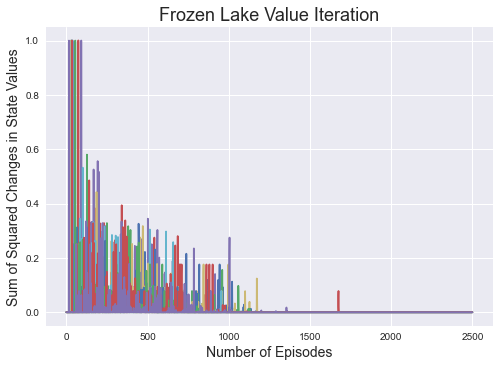

In [8]:
plt.style.use('seaborn')
plt.figure()
plt.title('Frozen Lake Value Iteration', fontsize = 18)
plt.xlabel("Number of Episodes", fontsize=14)
plt.ylabel("Sum of Squared Changes in State Values", fontsize=14)
for record in delta_record:
    plt.plot(record)
plt.savefig("FL_VI.png")

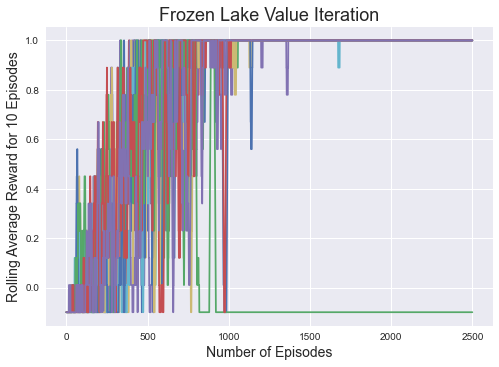

In [9]:
plt.style.use('seaborn')
plt.figure()
plt.title('Frozen Lake Value Iteration', fontsize = 18)
plt.xlabel("Number of Episodes", fontsize=14)
plt.ylabel("Rolling Average Reward for 10 Episodes", fontsize=14)
for record in rewards_record:
    plt.plot(record)
plt.savefig("FL_VI_reward.png")